In [38]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [39]:
import numpy as np
import pandas as pd

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func

In [41]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
 # reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
# reflect the tables

['measurement', 'station']

In [43]:
# We can view all of the classes that automap found

In [44]:
 # Save references to each table
measure = Base.classes.measurement
station = Base.classes.station

In [45]:
 # Create our session (link) from Python to the DB
    session = Session(engine)

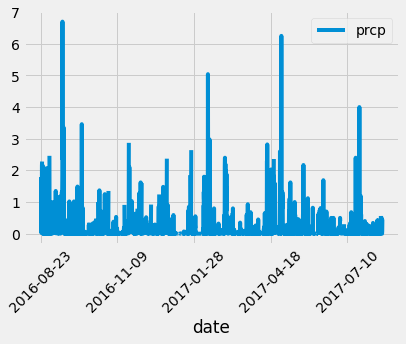

In [46]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results
months = session.query(measure.date).order_by(measure.date.desc()).first()
months
#Ins_dates examples


#session.query(Invoices.BillingCountry).group_by(Invoices.BillingCountry).all()
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date
# Perform a query to retrieve the precipitation scores and dates
prc = session.query(measure.date, measure.prcp).filter(measure.date >= query_date).all()
prc
# Save the query results as a Pandas DataFrame and set the index to the date column
new_rc = pd.DataFrame(prc, columns = ["date","prcp"])
new_rc 

new_rc = new_rc.set_index("date")
new_rc
# Sort the dataframe by date
date_prc = new_rc.sort_index()
date_prc
# Use Pandas Plotting to plot the data
date_prc.plot(rot=45)
plt.show()

In [47]:
new_rc = pd.DataFrame(prc, columns = ["date","prcp"])
new_rc 

new_rc = new_rc.set_index("date")
new_rc

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [48]:
 # Use Pandas to calculate the summary statistics for the precipitation data
new_rc.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station.station).count()
station_count

9

In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations =  session.query(measure.station, func.count(measure.station)).group_by(measure.station).all()
active_stations


[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [51]:
# List the stations and the counts in descending order.
ordered_stations = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station).desc()).all()
ordered_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
low_temp = session.query(measure.tobs, func.min(measure.tobs)).first()
low_temp
    # highest temperature recorded, and average temperature of the most active station?


(53.0, 53.0)

In [53]:
high_temp = session.query(measure.tobs, func.max(measure.tobs), func.avg(measure.tobs)).first()
high_temp

(87.0, 87.0, 73.09795396419437)

In [87]:
# Choose the station with the highest number of temperature observations.
most_temp = session.query(measure.station, func.count(measure.tobs)).group_by(measure.station).order_by(func.count(measure.tobs).desc()).first()
most_temp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


('USC00519281', 2772)

In [94]:
temp = session.query(measure.tobs).filter(measure.date >= query_date).filter(measure.station == "USC00519281").all()#.group_by(measure.station).order_by(func.count(measure.tobs).desc())..all()
temp

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [88]:
temp_try = session.query(most_temp)

InvalidRequestError: SQL expression, column, or mapped entity expected - got '('USC00519281', 2772)'

In [95]:
new_temp = pd.DataFrame(temp, columns = ["tobs"])
new_temp

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


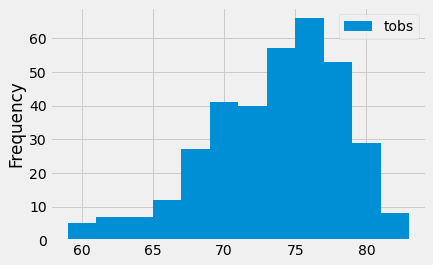

In [99]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_histogram = new_temp.plot.hist(bins=12)
temp_histogram

In [101]:
session.close()